In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sympy.physics.units as u
import sympy as sp
import numpy as np
import logging as log
import functools
import matplotlib.pyplot as plt
import seaborn
import pandas as pd
pd.set_option('display.max_columns', None)
%matplotlib inline
from IPython.display import display, HTML

import importlib.util
#spec = importlib.util.spec_from_file_location("miptlabs", "/full/path/to/miptlabs.py")
#miptlabs = importlib.util.module_from_spec(spec)
#spec.loader.exec_module(miptlabs)
#ml = miptlabs

import miptlabs as ml
importlib.reload(ml)

import sys, importlib
importlib.reload(log)
log.basicConfig(level=log.INFO, format='LOG %(message)s', stream=sys.stdout)

sp.Basic.__str__=lambda expr, **settings:ml.PQStrPrinter(settings).doprint(expr)

sp.__version__

'1.1.2.dev'

In [90]:
def get_teslameter_error(val, diap):
    return 2+0.1*(diap/val-1)

In [82]:
data = pd.read_csv('lab1.2 table.csv')
#display(data)
df = pd.DataFrame()
df['L'] = ml.get_column(data, 'L', lambda row: ml.PQ(row['L']*u.cm, sigma=0.1*u.cm, dim=u.cm))
df['B'] = ml.get_column(data, 'B', lambda row: ml.PQ(row['B']*1e-3*u.tesla, sigma=0.01*1e-3*u.tesla))
# d - толщина, l - длина стороны/диаметр для квадратных и круглых магнитов
d_sqr = ml.PQ(3.95*u.mm, sigma=0.05*u.mm)
l_sqr = ml.PQ(9.95*u.mm, sigma=0.05*u.mm)
d_cyl = ml.PQ(4.95*u.mm, sigma=0.05*u.mm)
l_cyl = ml.PQ(9.95*u.mm, sigma=0.05*u.mm)
# При такой L были измерения при различных I
L = ml.PQ(4*u.cm, sigma=0.1*u.cm)
df['I'] = ml.get_column(data, 'I', lambda row: ml.PQ(row['I']*u.amperes, sigma=0.1*u.amperes))
df['B2'] = ml.get_column(data, 'B2', lambda row: ml.PQ(row['B2']*1e-3*u.tesla, sigma=0.01*1e-3*u.tesla))
df['B2 diap'] = ml.get_column(data, 'B2 diap', lambda row: ml.PQ(row['B2 diap']*1e-3*u.tesla, is_const=True))

In [83]:
df

,L,B,I,B2,B2 diap
0,0.00±0.10 cm (NaN%),(784.00±1.00)*10^-5 T (0.13%),0.50±0.10 A (20%),(825.00±1.00)*10^-5 T (0.12%),0.020000 T
1,0.50±0.10 cm (20%),(794.00±1.00)*10^-5 T (0.13%),1.00±0.10 A (10%),(1584.00±1.00)*10^-5 T (0.063%),0.020000 T
2,1.00±0.10 cm (10%),(804.00±1.00)*10^-5 T (0.12%),1.50±0.10 A (6.7%),(2320.00±1.00)*10^-5 T (0.043%),0.200000 T
3,1.50±0.10 cm (6.7%),(810.00±1.00)*10^-5 T (0.12%),2.00±0.10 A (5.0%),(3040.00±1.00)*10^-5 T (0.033%),0.200000 T
4,2.00±0.10 cm (5.0%),(816.00±1.00)*10^-5 T (0.12%),2.50±0.10 A (4.0%),(3810.00±1.00)*10^-5 T (0.026%),0.200000 T
5,2.50±0.10 cm (4.0%),(819.00±1.00)*10^-5 T (0.12%),NaN,NaN,NaN
6,3.00±0.10 cm (3.3%),(822.00±1.00)*10^-5 T (0.12%),NaN,NaN,NaN
7,3.50±0.10 cm (2.9%),(824.00±1.00)*10^-5 T (0.12%),NaN,NaN,NaN
8,4.00±0.10 cm (2.5%),(825.00±1.00)*10^-5 T (0.12%),NaN,NaN,NaN
9,4.50±0.10 cm (2.2%),(824.00±1.00)*10^-5 T (0.12%),NaN,NaN,NaN


In [84]:
#display(ml.prepare_to_print(pd.DataFrame(df)))

table_to_print = ml.prepare_to_print(df)
#display(table_to_print)
#write_latex('lab2.2.2 table.tex', table_to_print)
ml.write_latex('lab2.1 table1.tex', table_to_print[table_to_print.columns])


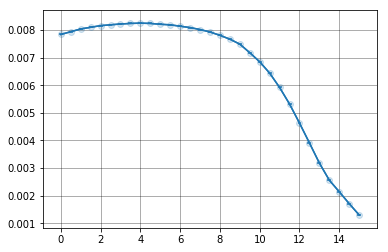

In [85]:
ml.plt_pq(df['L'], df['B'])

(array([ 0.014852,  0.00088 ]), [6.8422218613317651e-05, 3.4211109306658825e-05])
(14.9±0.9)*10^-3 A/T (5.9%)


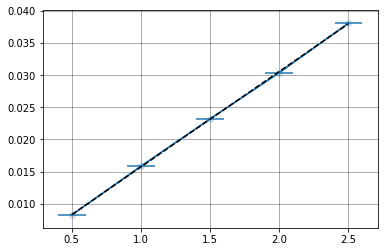

In [100]:
ml.plt_pq(df['I'].dropna(), df['B2'].dropna(), ols=True)
ols = ml.OLS(df['I'].dropna(), df['B2'].dropna())
print(ols)
print(ml.PQ(ols[0][0]*u.A/u.T, sigma=ols[0][1]*u.A/u.T))

In [94]:
# Часть 2


In [92]:
# Часть 3
df2 = pd.DataFrame()

df2['B square'] = ml.get_column(data, 'B square', lambda row: ml.PQ(row['B square']*1e-3*u.tesla, sigma=0.1*1e-3*u.tesla))
df2['n'] = ml.get_column(data, 'n', lambda row: int(row['n']))

In [93]:
df2

,B square,n
0,(2910.0±1.0)*10^-4 T (0.034%),1
1,(3940.0±1.0)*10^-4 T (0.025%),2
2,(4330.0±1.0)*10^-4 T (0.023%),3
3,(4530.0±1.0)*10^-4 T (0.022%),4
4,(4630.0±1.0)*10^-4 T (0.022%),5
5,(4690.0±1.0)*10^-4 T (0.021%),6
6,(4720.0±1.0)*10^-4 T (0.021%),7
7,(4750.0±1.0)*10^-4 T (0.021%),8
8,(4760.0±1.0)*10^-4 T (0.021%),9
9,(4770.0±1.0)*10^-4 T (0.021%),10
